In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
import random

url= "https://data.lacity.org/resource/2nrs-mtv8.json"
respose =requests.get(url).json()

In [2]:
from config import g_key
gmaps.configure(api_key=g_key)

In [3]:
# Create dataframe
crime_df = pd.read_csv('../../Resources/crime_data.csv')
crime_df.dropna(inplace = True, how="all") 
crime_df    

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301481,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
301482,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
301483,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775
301484,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351


In [4]:
# focusing only on 2020
crime_df["DATE OCC"]=pd.to_datetime(crime_df["DATE OCC"])
# Creating new columns for year 
crime_df["Year Occured"] = [date.year for date in crime_df["DATE OCC"]]
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occured
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020


In [5]:
# focusing on only the year 2020
twenty_twenty_crime=crime_df.loc[crime_df["Year Occured"]==2020,:]
twenty_twenty_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occured
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197062,200814793,10/02/2020 12:00:00 AM,2020-10-02,1330,8,West LA,853,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,Adult Other,440.0,998.0,NaN,NaN,11400 SANTA MONICA BL,NaN,34.0457,-118.4511,2020
197063,210612830,07/17/2021 12:00:00 AM,2020-12-15,1200,6,Hollywood,659,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,5100 W SUNSET BL,NaN,34.0981,-118.3010,2020
197064,200315957,08/18/2020 12:00:00 AM,2020-08-18,1130,3,Southwest,362,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Arrest,624.0,NaN,NaN,NaN,4800 OBAMA BL,NaN,34.0214,-118.3486,2020
197065,211009262,06/20/2021 12:00:00 AM,2020-07-11,1000,10,West Valley,1065,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,18000 VENTURA BL,NaN,34.1675,-118.5226,2020


In [6]:
# focusing on only the area name and tyoe of crime
filtered_2020_dataframe = twenty_twenty_crime. filter(['AREA NAME', 'Crm Cd Desc'])
filtered_2020_dataframe

,AREA NAME,Crm Cd Desc
0,Southwest,BATTERY - SIMPLE ASSAULT
1,Central,BATTERY - SIMPLE ASSAULT
2,77th Street,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
...,...,...
197062,West LA,THEFT PLAIN - PETTY ($950 & UNDER)
197063,Hollywood,BURGLARY
197064,Southwest,BATTERY - SIMPLE ASSAULT
197065,West Valley,BURGLARY


In [23]:
area_name=twenty_twenty_crime["AREA NAME"].value_counts()
area_name

77th Street    13110
Central        11483
Pacific        11463
Southwest      11037
Southeast      10688
Hollywood      10039
N Hollywood    10022
Newton          9866
Olympic         9508
West LA         9189
Wilshire        9157
Rampart         8912
Harbor          8772
Van Nuys        8641
Mission         8361
Northeast       8353
Topanga         7972
West Valley     7930
Devonshire      7838
Hollenbeck      7737
Foothill        6989
Name: AREA NAME, dtype: int64

In [8]:
# new_dataframe=crime_df.loc[crime_df["AREA NAME"]== "Southwest"]
# crimes_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
# display(crimes_dataframe.to_string())

In [9]:
# Create dataframe
crimes_2019_df = pd.read_csv('../../Resources/2019_crime_data.csv')
crimes_2019_df.dropna(inplace = True, how="all") 
crimes_2019_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,190805874,2/12/2019 0:00,2/12/2019 0:00,1900,8,West LA,857,310,BURGLARY,34,...,P,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,1500 BEVERWIL DR,NaN,34.0524,-118.3986
1,191213477,5/12/2019 0:00,5/12/2019 0:00,200,12,77th Street,1203,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,...,H,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,1700 W 45TH ST,NaN,34.0028,-118.3089
2,190409679,5/10/2019 0:00,5/10/2019 0:00,330,4,Hollenbeck,489,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,...,H,PARKING LOT,304.0,CLUB/BAT,IC,Invest Cont,1300 S SOTO ST,NaN,34.0263,-118.2196
3,191510263,5/1/2019 0:00,4/30/2019 0:00,1610,15,N Hollywood,1599,624,BATTERY - SIMPLE ASSAULT,53,...,O,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2800 MONTCALM AV,NaN,34.1223,-118.3563
4,190320119,8/30/2019 0:00,8/30/2019 0:00,1815,3,Southwest,354,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,49,...,B,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,2700 OBAMA BL,NaN,34.0222,-118.3227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217529,191904534,1/12/2019 0:00,1/12/2019 0:00,50,19,Mission,1951,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",42,...,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other,15400 CHATSWORTH ST,NaN,34.2646,-118.4673
217530,190325632,12/1/2019 0:00,11/30/2019 0:00,1900,3,Southwest,331,330,BURGLARY FROM VEHICLE,34,...,H,DRIVEWAY,NaN,NaN,IC,Invest Cont,2900 S RIMPAU BL,NaN,34.0278,-118.3508
217531,191321935,11/7/2019 0:00,10/3/2019 0:00,100,13,Newton,1364,354,THEFT OF IDENTITY,30,...,B,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,4900 S CENTRAL AV,NaN,33.9989,-118.2565
217532,190912178,6/12/2019 0:00,6/11/2019 0:00,600,9,Van Nuys,909,626,INTIMATE PARTNER - SIMPLE ASSAULT,34,...,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,7400 WOODMAN AV,NaN,34.2049,-118.4313


In [35]:
area_2019_name=crimes_2019_df["AREA NAME"].value_counts()
area_2019_name

77th Street    14174
Central        13561
Southwest      13468
Pacific        12232
Southeast      11701
Hollywood      11141
N Hollywood    11070
Newton         10720
Wilshire       10409
Olympic        10199
Topanga         9638
Northeast       9630
Van Nuys        9549
Rampart         9503
West LA         9214
Mission         9117
Devonshire      8961
Harbor          8677
West Valley     8651
Hollenbeck      8340
Foothill        7579
Name: AREA NAME, dtype: int64

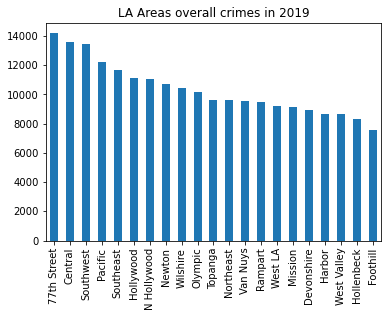

In [37]:
area_2019_name=crimes_2019_df["AREA NAME"].value_counts().plot(kind='bar')
# area_2019_name

plt.title("LA Areas overall crimes in 2019")
plt.show()

In [25]:
x=["77th Street" , "Central", "Pacific ", "Southwest", "Southeast", "Hollywood", "N Hollywood",
  "Newton", "Olympic", "West LA", "Wilshire", "Rampart", "Harbor", "Van Nuys", "Mission", "Northeast",
  "Topanga", "West Valley", "Devonshire", "Hollenbeck", "Foothill"]
# Putting both years and crimes in one table
table_df = pd.DataFrame({'Area Names':x, '2019':area_2019_name, '2020':area_name})
new_table_df = table_df.set_index('Area Names')
new_table_df

,2019,2020
Area Names,,
77th Street,14174,13110
Central,13561,11483
Pacific,8961,7838
Southwest,7579,6989
Southeast,8677,8772
Hollywood,8340,7737
N Hollywood,11141,10039
Newton,9117,8361
Olympic,11070,10022


In [26]:
new_table_df.head(10)

,2019,2020
Area Names,,
77th Street,14174,13110
Central,13561,11483
Pacific,8961,7838
Southwest,7579,6989
Southeast,8677,8772
Hollywood,8340,7737
N Hollywood,11141,10039
Newton,9117,8361
Olympic,11070,10022


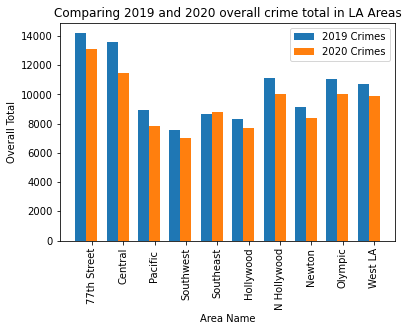

In [31]:
# create variables
twnety_nghteen=[14174, 13561, 8961, 7579, 8677, 8340, 11141, 9117, 11070, 10720]
twenty_twenty=[13110, 11483, 7838, 6989, 8772, 7737, 10039, 8361, 10022, 9866]
# create new dataframe for lists
new_df = pd.DataFrame({

    'twnety_nghteen': twnety_nghteen,

    'twenty_twenty': twenty_twenty

})

index = np.arange(len(new_df))
# set bar size
bar_width = .35

fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_df["twnety_nghteen"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_df["twenty_twenty"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Area Name')
# set y label
ax.set_ylabel('Overall Total')
# create title
ax.set_title('Comparing 2019 and 2020 overall crime total in LA Areas')

ax.set_xticks(index + bar_width )
# name bar variables
ax.set_xticklabels(["77th Street" , "Central", "Pacific ", "Southwest", "Southeast", "Hollywood", "N Hollywood",
  "Newton", "Olympic", "West LA"])
# create box for years
ax.legend()
# rotate tick labels
plt.xticks(rotation=90)
# show bar graph
plt.show()

In [42]:
# Finding the perecentage for 2020 areas
Area_Count=twenty_twenty_crime["AREA NAME"].value_counts()
Area_total=twenty_twenty_crime["AREA NAME"].count()
Percent_Area=round((Area_Count / Area_total) * 100,2).sort_values()
Percent_Area

Foothill       3.55
Hollenbeck     3.93
Devonshire     3.98
West Valley    4.02
Topanga        4.05
Northeast      4.24
Mission        4.24
Van Nuys       4.38
Harbor         4.45
Rampart        4.52
Wilshire       4.65
West LA        4.66
Olympic        4.82
Newton         5.01
N Hollywood    5.09
Hollywood      5.09
Southeast      5.42
Southwest      5.60
Pacific        5.82
Central        5.83
77th Street    6.65
Name: AREA NAME, dtype: float64

In [44]:
# Finding the perecentage for 2019 areas
Area_2019_Count=crimes_2019_df["AREA NAME"].value_counts()
Area_2019_total=crimes_2019_df["AREA NAME"].count()
Percent_2019_Area=round((Area_2019_Count / Area_2019_total) * 100,2).sort_values()
Percent_2019_Area

Foothill       3.48
Hollenbeck     3.83
West Valley    3.98
Harbor         3.99
Devonshire     4.12
Mission        4.19
West LA        4.24
Rampart        4.37
Van Nuys       4.39
Northeast      4.43
Topanga        4.43
Olympic        4.69
Wilshire       4.78
Newton         4.93
N Hollywood    5.09
Hollywood      5.12
Southeast      5.38
Pacific        5.62
Southwest      6.19
Central        6.23
77th Street    6.52
Name: AREA NAME, dtype: float64

In [47]:
percent_2019=[3.48, 3.83, 3.98, 3.99, 4.12, 4.19, 4.24, 4.37, 4.39, 4.43, 4.43, 4.69, 4.78, 4.93, 5.09, 5.12, 5.38, 5.62, 6.19, 6.23, 6.52]
percent_2020=[3.55, 3.93, 3.98, 4.02, 4.05, 4.24, 4.24, 4.38, 4.45, 4.52, 4.65, 4.66, 4.82, 5.01, 5.09, 5.09, 5.42, 5.60, 5.82, 5.83, 6.65]

In [48]:
x=["Foothill" , "Hollenbeck","West Valley ","Harbor", "Devonshire", "Mission", "West LA", "Rampart", "Van Nuys", "Northeast",
 "Topanga", "Olympic", "Wilshire", "Newton", "N Hollywood ", "Hollywood", "Southeast", "Pacific","Southwest", "Central", "77th Street"]
# Putting both years and crimes in one table
table_df = pd.DataFrame({'Area Names':x, '2019':percent_2019, '2020':percent_2020})
new_table_df = table_df.set_index('Area Names')
new_table_df

,2019,2020
Area Names,,
Foothill,3.48,3.55
Hollenbeck,3.83,3.93
West Valley,3.98,3.98
Harbor,3.99,4.02
Devonshire,4.12,4.05
Mission,4.19,4.24
West LA,4.24,4.24
Rampart,4.37,4.38
Van Nuys,4.39,4.45


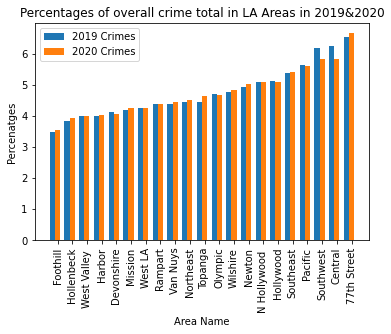

In [51]:
# create new dataframe for lists
new_df = pd.DataFrame({

    'percent_2019': percent_2019,

    'percent_2020': percent_2020

})

index = np.arange(len(new_df))
# set bar size
bar_width = .35

fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_df["percent_2019"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_df["percent_2020"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Area Name')
# set y label
ax.set_ylabel('Percenatges')
# create title
ax.set_title('Percentages of overall crime total in LA Areas in 2019&2020')

ax.set_xticks(index + bar_width )
# name bar variables
ax.set_xticklabels(["Foothill" , "Hollenbeck","West Valley ","Harbor", "Devonshire", "Mission", "West LA", "Rampart", "Van Nuys", "Northeast",
 "Topanga", "Olympic", "Wilshire", "Newton", "N Hollywood ", "Hollywood", "Southeast", "Pacific","Southwest", "Central", "77th Street"])
# create box for years
ax.legend()
# rotate tick labels
plt.xticks(rotation=90)
# show bar graph
plt.show()

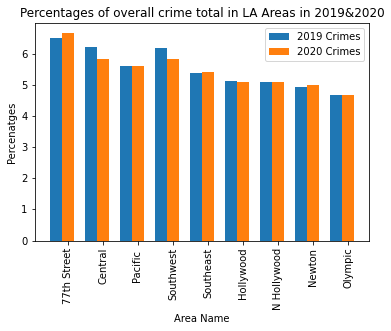

In [55]:
percentage_2019=[6.52, 6.23, 5.62, 6.19, 5.38, 5.12, 5.09, 4.93, 4.69]
percentage_2020=[6.65, 5.83, 5.60, 5.82, 5.42, 5.09, 5.09, 5.01, 4.66 ]

# create new dataframe for lists
new_df = pd.DataFrame({

    'percentage_2019': percentage_2019,

    'percentage_2020': percentage_2020

})

index = np.arange(len(new_df))
# set bar size
bar_width = .35

fig, ax = plt.subplots()
'""'
type_2019 = ax.bar(index, new_df["percentage_2019"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_df["percentage_2020"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Area Name')
# set y label
ax.set_ylabel('Percenatges')
# create title
ax.set_title('Percentages of overall crime total in LA Areas in 2019&2020')

ax.set_xticks(index + bar_width )
# name bar variables
ax.set_xticklabels(["77th Street" , "Central", "Pacific ", "Southwest", "Southeast", "Hollywood", "N Hollywood",
  "Newton", "Olympic"])
# create box for years
ax.legend()
# rotate tick labels
plt.xticks(rotation=90)
# show bar graph
plt.show()

In [10]:
new_dataframe=twenty_twenty_crime.loc[twenty_twenty_crime["AREA NAME"]== "77th Street"]
crimes_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
crimes_dataframe.head(10)

VEHICLE - STOLEN                                           1585
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             1507
INTIMATE PARTNER - SIMPLE ASSAULT                          1017
BATTERY - SIMPLE ASSAULT                                    984
ROBBERY                                                     838
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     820
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    580
BURGLARY FROM VEHICLE                                       530
BURGLARY                                                    453
THEFT PLAIN - PETTY ($950 & UNDER)                          432
Name: Crm Cd Desc, dtype: int64

In [11]:
new_2019_dataframe=crimes_2019_df.loc[crimes_2019_df["AREA NAME"]== "77th Street"]
crimes_2019_dataframe=new_2019_dataframe["Crm Cd Desc"].value_counts()
crimes_2019_dataframe.head(10)

VEHICLE - STOLEN                                           1311
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             1258
BATTERY - SIMPLE ASSAULT                                   1155
INTIMATE PARTNER - SIMPLE ASSAULT                          1132
ROBBERY                                                    1012
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     789
BURGLARY FROM VEHICLE                                       692
BURGLARY                                                    652
THEFT PLAIN - PETTY ($950 & UNDER)                          614
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    611
Name: Crm Cd Desc, dtype: int64

In [13]:
# creating your lists
seven_2019_crimes = [1311, 1258, 1155, 1132, 1012]
seven_2020_crimes = [1585, 1507, 1017, 984, 838]
# create a new dataframe with lists
new_seven_df = pd.DataFrame({'seven_2019_crimes': seven_2019_crimes
                       'seven_2020_crimes': seven_2020_crimes

})

index = np.arange(len(new_df))
# size of each bar
bar_width = .35

fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_seven_df["seven_2019_crimes"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_seven_df["seven_2020_crimes"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Types Of Crimes')
# set y label
ax.set_ylabel('Number of Crimes Committed')
# create title
ax.set_title('Comparing 2019 and 2020 top 5 crimes on 77th street')

ax.set_xticks(index + bar_width )
# set categories under bar chart
ax.set_xticklabels(["STOLEN VEHICLE ", "AGGRAVATED ASSAULT", "BATTERY", "SIMPLE ASSAULT", "ROBBERY"])
# show box within the bar chart
ax.legend()
# fix tick labels
plt.xticks(rotation=90)
# show bar chart
plt.show()

SyntaxError: invalid syntax (<ipython-input-13-598e87677ae6>, line 6)

In [12]:
new_dataframe=twenty_twenty_crime.loc[twenty_twenty_crime["AREA NAME"]== "Southwest"]
crimes_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
crimes_dataframe.head(10)

BATTERY - SIMPLE ASSAULT                                   1072
VEHICLE - STOLEN                                           1066
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              749
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     708
INTIMATE PARTNER - SIMPLE ASSAULT                           677
THEFT PLAIN - PETTY ($950 & UNDER)                          524
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             494
BURGLARY FROM VEHICLE                                       489
ROBBERY                                                     486
BURGLARY                                                    444
Name: Crm Cd Desc, dtype: int64

In [13]:
new_2019_dataframe=crimes_2019_df.loc[crimes_2019_df["AREA NAME"]== "Southwest"]
crimes_2019_dataframe=new_2019_dataframe["Crm Cd Desc"].value_counts()
crimes_2019_dataframe.head(10)

BATTERY - SIMPLE ASSAULT                                   1256
THEFT PLAIN - PETTY ($950 & UNDER)                          911
INTIMATE PARTNER - SIMPLE ASSAULT                           873
BURGLARY FROM VEHICLE                                       794
VEHICLE - STOLEN                                            776
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              758
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     734
ROBBERY                                                     639
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             631
BURGLARY                                                    521
Name: Crm Cd Desc, dtype: int64

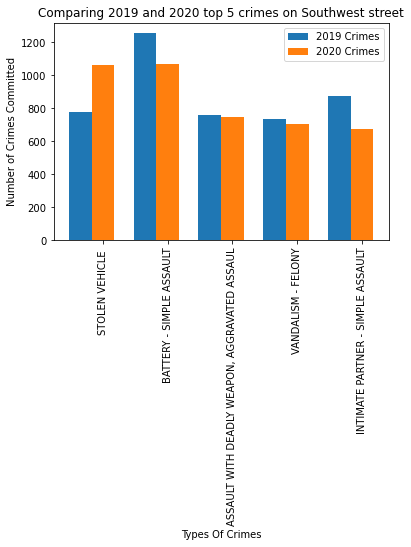

In [25]:
# creating your lists
num_of__2019_crimes = [776, 1256, 758, 734, 873]
num_of_2020_crimes = [1066, 1072, 749, 708, 677]
# create new dataframe for lists
new_df = pd.DataFrame({

    'num_of__2019_crimes': num_of__2019_crimes,

    'num_of_2020_crimes': num_of_2020_crimes

})

index = np.arange(len(new_df))
# set bar size
bar_width = .35

fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_df["num_of__2019_crimes"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_df["num_of_2020_crimes"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Types Of Crimes')
# set y label
ax.set_ylabel('Number of Crimes Committed')
# create title
ax.set_title('Comparing 2019 and 2020 top 5 crimes on Southwest street')

ax.set_xticks(index + bar_width )
# name bar variables
ax.set_xticklabels(["STOLEN VEHICLE ", "BATTERY - SIMPLE ASSAULT", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL", "VANDALISM - FELONY", "INTIMATE PARTNER - SIMPLE ASSAULT"])
# create box for years
ax.legend()
# rotate tick labels
plt.xticks(rotation=90)
# show bar graph
plt.show()

In [31]:
x=["Stolen Vehicle", "Battery - Simple Assault", "Assault with Deadly Weapon", "vandalism-Felony", "Intimate Partner- Simple Assualt"]
# Putting both years and crimes in one table
combining_df = pd.DataFrame({'Types Of Crime Reported':x, '2019':num_of__2019_crimes, '2020':num_of_2020_crimes})
combined_df = combining_df.set_index('Types Of Crime Reported')
combined_df

,2019,2020
Types Of Crime Reported,,
Stolen Vehicle,776,1066
Battery - Simple Assault,1256,1072
Assault with Deadly Weapon,758,749
vandalism-Felony,734,708
Intimate Partner- Simple Assualt,873,677


In [15]:
# outputing specific columns
new_2019_dataframe=crimes_2019_df.loc[crimes_2019_df["AREA NAME"]== "N Hollywood"]
# get the total counts of type of crimes reported
crimes_2019_dataframe=new_2019_dataframe["Crm Cd Desc"].value_counts()
# show top 10 crimes
crimes_2019_dataframe.head(10)

BURGLARY FROM VEHICLE                                       964
BURGLARY                                                    884
THEFT PLAIN - PETTY ($950 & UNDER)                          821
BATTERY - SIMPLE ASSAULT                                    821
VEHICLE - STOLEN                                            742
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     691
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             672
INTIMATE PARTNER - SIMPLE ASSAULT                           599
THEFT OF IDENTITY                                           548
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    407
Name: Crm Cd Desc, dtype: int64

In [16]:
# only ouput specific columns
new_dataframe=twenty_twenty_crime.loc[crime_df["AREA NAME"]== "N Hollywood"]
# get the total counts of type of crimes reported
crimes_2020_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
# show top 10 crimes
crimes_2020_dataframe.head(10)

VEHICLE - STOLEN                                           990
BURGLARY FROM VEHICLE                                      820
BURGLARY                                                   768
BATTERY - SIMPLE ASSAULT                                   747
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    636
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            571
THEFT PLAIN - PETTY ($950 & UNDER)                         561
THEFT OF IDENTITY                                          514
INTIMATE PARTNER - SIMPLE ASSAULT                          512
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             393
Name: Crm Cd Desc, dtype: int64

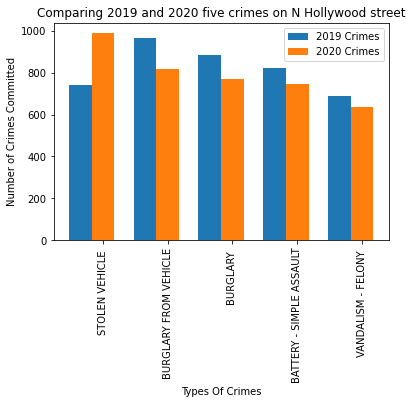

In [38]:
# create lists
n_hollywood_2019_crimes = [742, 964, 884, 821, 691]
n_hollywood_2020_crimes = [990, 820, 768, 747, 636]
# create new dataframe to input lists
new_df = pd.DataFrame({

    'n_hollywood_2019_crimes': n_hollywood_2019_crimes,

    'n_hollywood_2020_crimes': n_hollywood_2020_crimes

})

x_axis= np.arange(len(new_df))
# how big the bars will be
bar_width = .35
fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_df["n_hollywood_2019_crimes"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_df["n_hollywood_2020_crimes"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Types Of Crimes')
# set y label
ax.set_ylabel('Number of Crimes Committed')
# create title
ax.set_title('Comparing 2019 and 2020 five crimes on N Hollywood street')

ax.set_xticks(index + bar_width )
# set categories under bar chart
ax.set_xticklabels(["STOLEN VEHICLE ", "BURGLARY FROM VEHICLE", "BURGLARY ", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY "])
# show box within the bar chart
ax.legend()
# fix tick labels
# fig.autofmt_xdate()
plt.xticks(rotation=90)
# show bar chart
plt.show()

In [40]:
x=["Stolen Vehicle", "Burglary From Vehicle", "Burglary", "Battery - Simple Assault", "Vandalism-Felony"]
# Putting both years and crimes in one table
combining_n_df = pd.DataFrame({'Types Of Crime Reported':x, '2019':n_hollywood_2019_crimes, '2020':n_hollywood_2020_crimes})
combined_n_df = combining_n_df.set_index('Types Of Crime Reported')
combined_n_df

,2019,2020
Types Of Crime Reported,,
Stolen Vehicle,742,990
Burglary From Vehicle,964,820
Burglary,884,768
Battery - Simple Assault,821,747
Vandalism-Felony,691,636
